# Problem Statement: 

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

In [88]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Importing all the necessary libraries.

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

Importing or downloading the dataset from github

In [7]:
df
#checking the dataset

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Exploratory Data Analysis (EDA) :

In [19]:
#checking the columns included
df.columns

Index(['Wins', 'Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples',
       'Home Runs', 'Base on Balls', 'Strike Outs', 'Stolen Base',
       'Runs Average', 'Earned Runs', 'Earned Run Average', 'Complete Game',
       'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

We can see that the column names of above data are difficult to understand, we need to elaborate these column name to make it easy to understand

In [12]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Here we can see that the "Wins" column is our target label and the remaining columns are our features that will determine and help us predicting the wins in a particular baseball game. As the target label "Wins" comprises of all continous data it makes this to be a Regression problem.

In [9]:
# Checking shape of dataset
df.shape

(30, 17)

In [10]:
# Checking datatypes of each variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.0 KB


Since there are no object datatype present in our dataset no encoding process will be needed.

In [25]:
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

There is missing data in our dataset either so we won't have to worry about handling missing data.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


we are using the Transpose method to view the description details clearly. Looking at the first column we can clearly see that all of them have 30.0 as their count confirming no missing values. Also, there are no visible abnormalities.

In [15]:
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

The acceptable range for skewness is between +/-0.5. We see columns such as Runs Scored, Hits, Runs Average, Earned Runs, Earned Run Average, Complete Game, Saves and Errors being slightly out of this range.

In [16]:
df.nunique()

Wins                  24
Runs Scored           28
At Bat                29
Hits                  29
Doubles               22
Triples               23
Home Runs             27
Base on Balls         29
Strike Outs           29
Stolen Base           27
Runs Average          30
Earned Runs           30
Earned Run Average    30
Complete Game          9
Shut Outs             12
Saves                 20
Errors                21
dtype: int64

Results shows that there are no categorical data since even the unique numbers are large in number and cannot be segregated or combined.

# Visualization :
 
# Checking the Correlation :

In [28]:
dfcorr=df.corr()
dfcorr

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs Scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home Runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base on Balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strike Outs,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


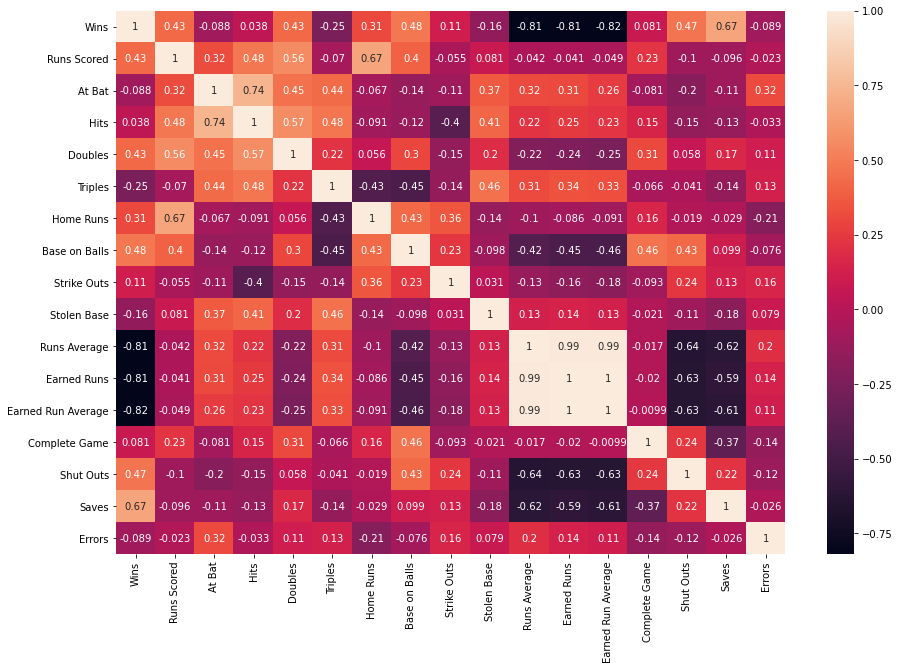

In [29]:
#Checking correlation using Heat Map to get high and low correlated parameteres
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

<AxesSubplot:>

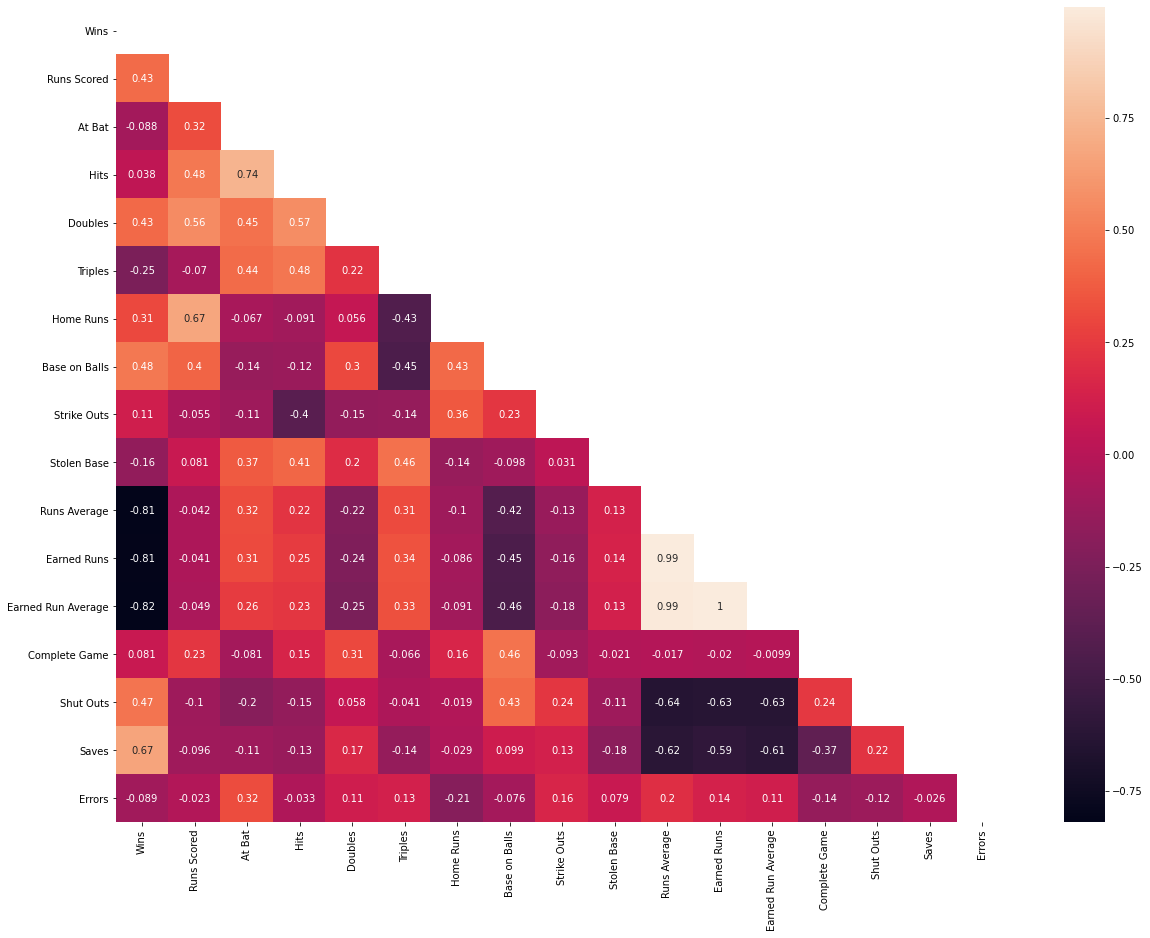

In [30]:
import matplotlib.pyplot as plt
#correlation matrix
plt.figure(figsize=(20,15))
#ax=subplot(111)
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix)

Univariate Analysis :

Distribution Plot 

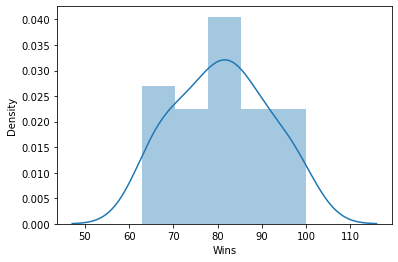

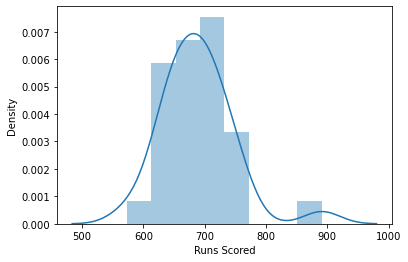

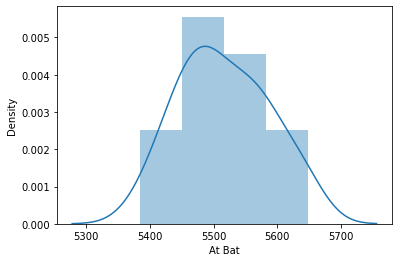

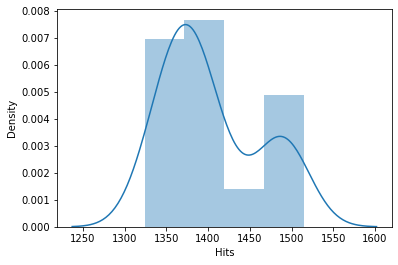

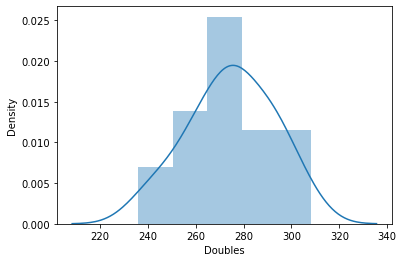

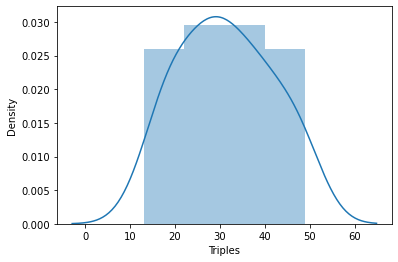

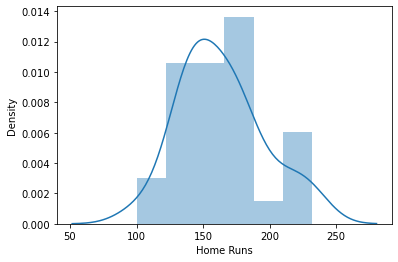

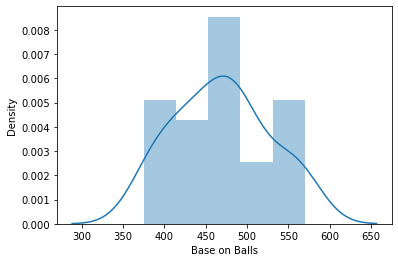

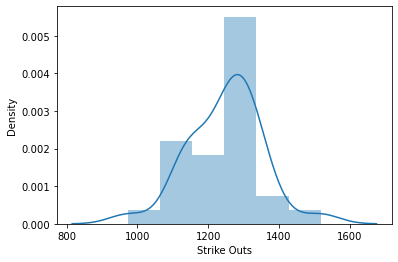

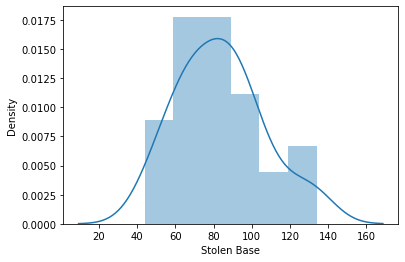

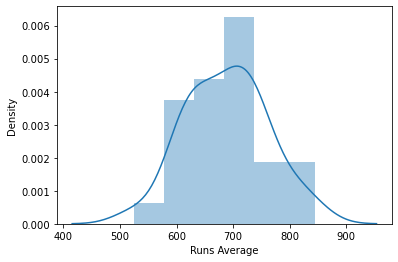

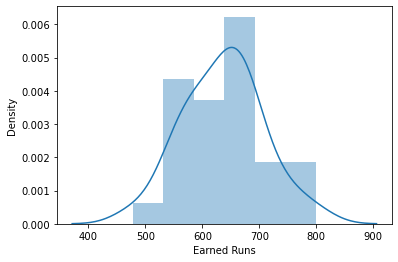

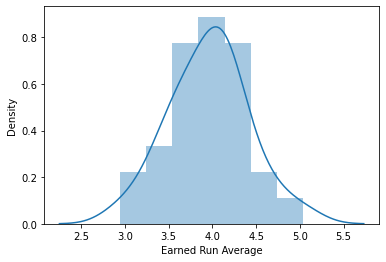

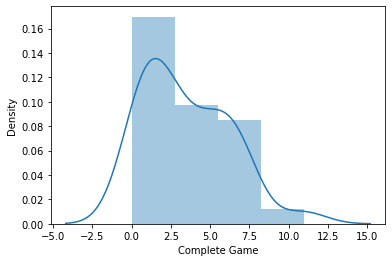

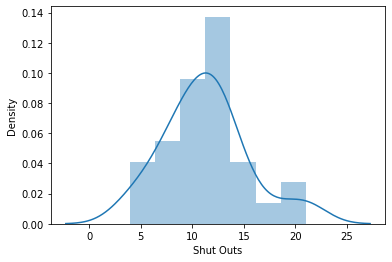

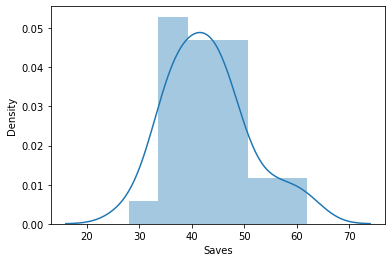

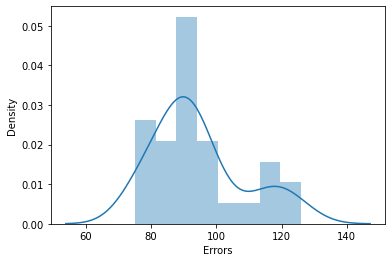

In [31]:
#Distribution of data

for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

We can see that all our column data are normally distributed except for Runs Scored, Complete Game, Shut Outs and Errors columns that have slight skewness in them and will need to be treated accordingly.

Checking for the Outliers

Box Plot : 

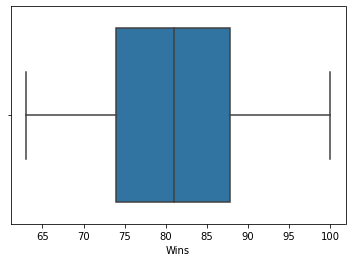

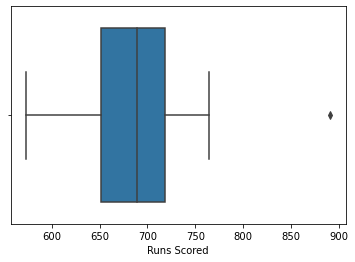

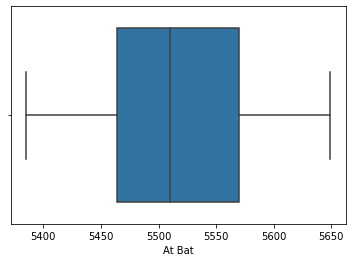

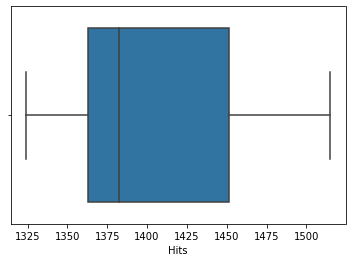

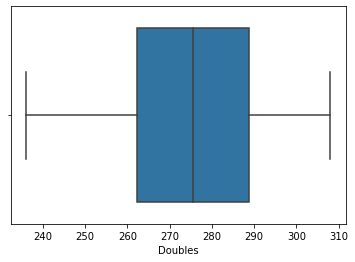

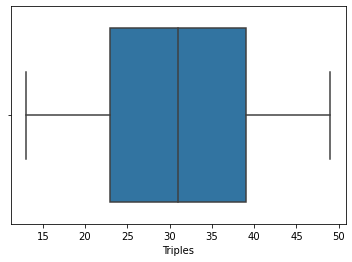

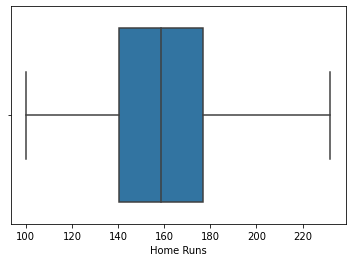

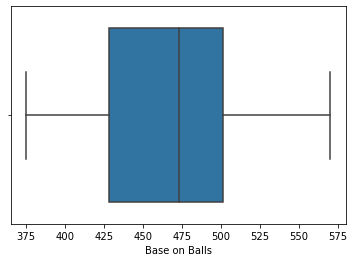

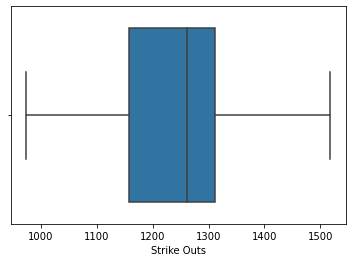

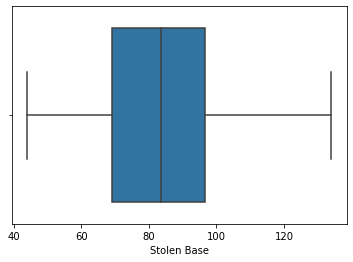

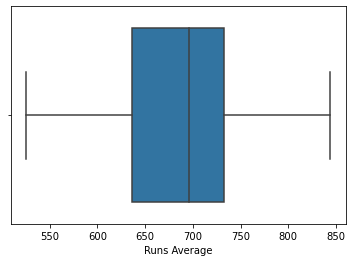

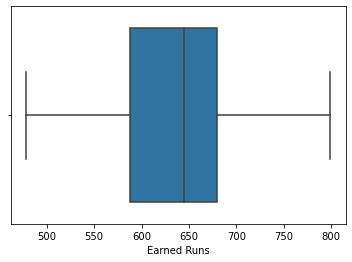

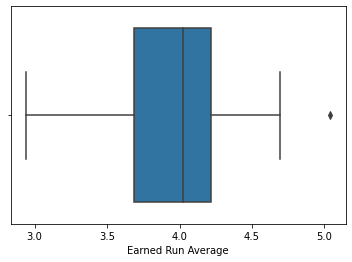

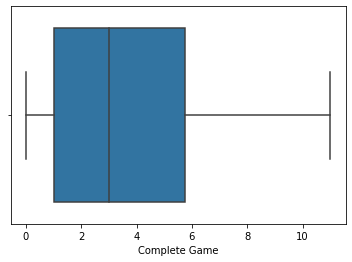

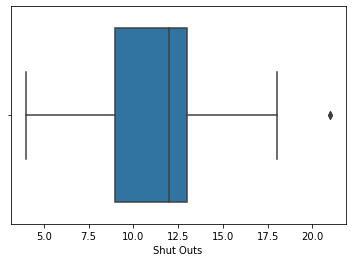

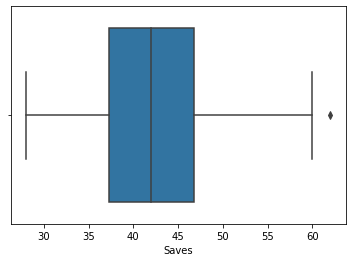

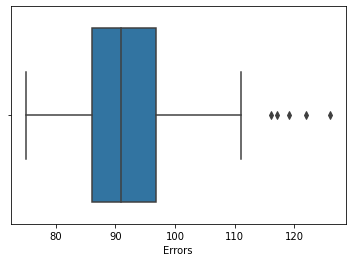

In [32]:
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])

Box plot clearly shows few outlier points present in Runs Scored, Earned Run Average, Shut Outs, Saves and Errors. These will need to be treated further before building our machine learning model.

Strip Plot :

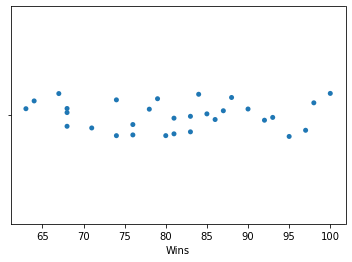

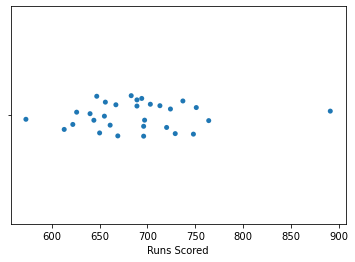

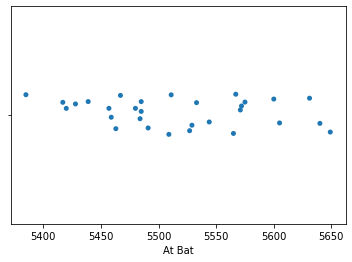

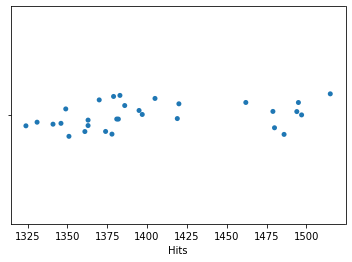

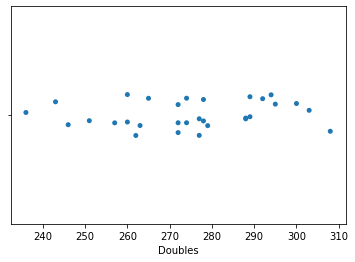

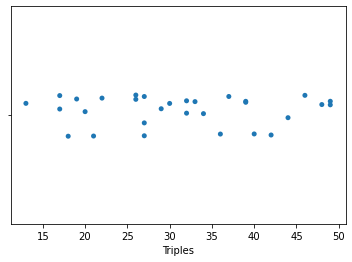

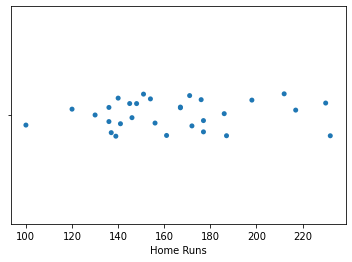

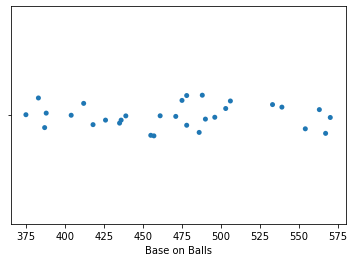

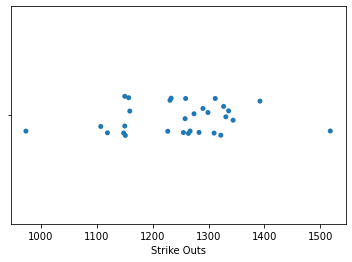

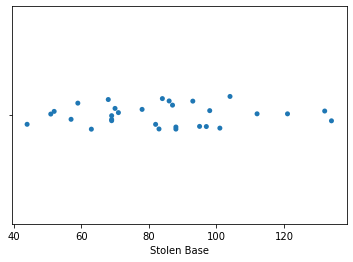

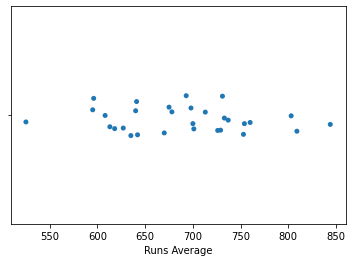

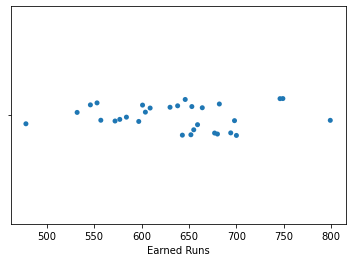

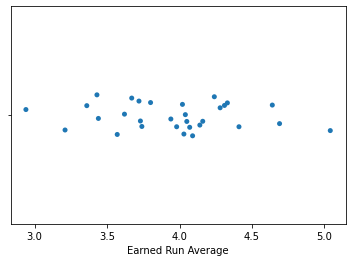

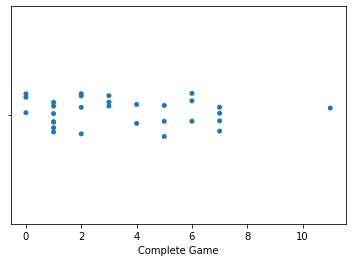

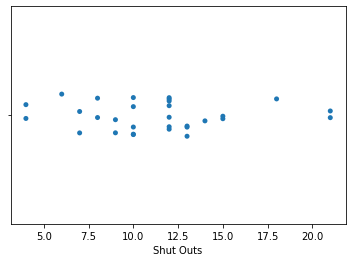

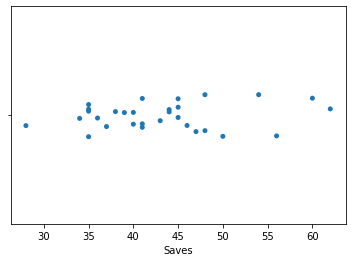

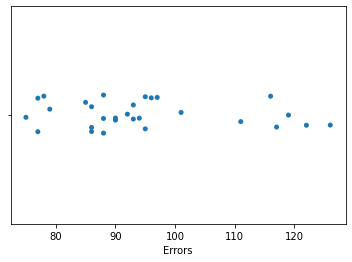

In [33]:
for i in df.columns:
    plt.figure()
    sns.stripplot(df[i])

From strip plot we are able to take a look at data point distribution across the data set and it's range details. We can see columns Runs Scored, Strike Outs, Complete Game with single data points further away from the general accumulation indicating towards the presence of ouliers.

Line Plot : 

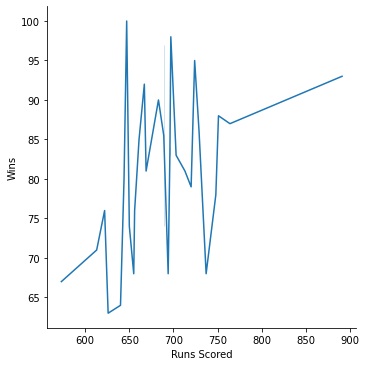

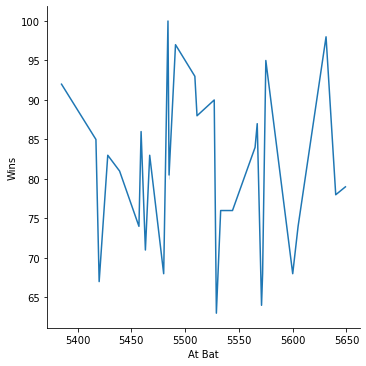

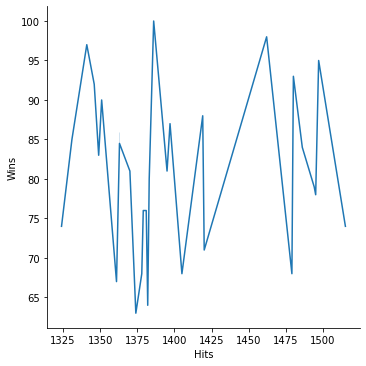

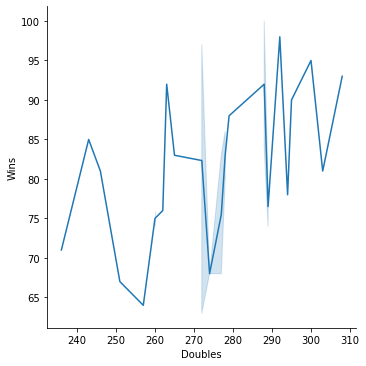

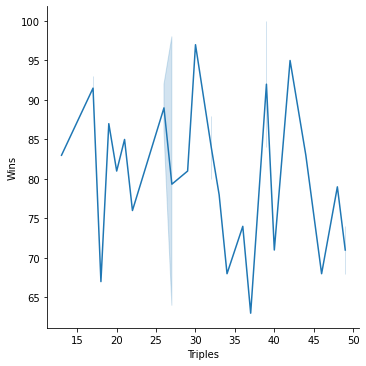

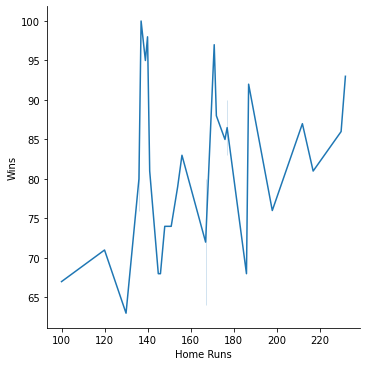

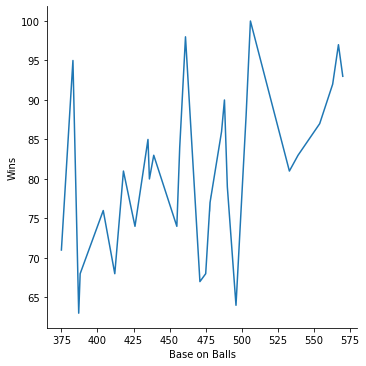

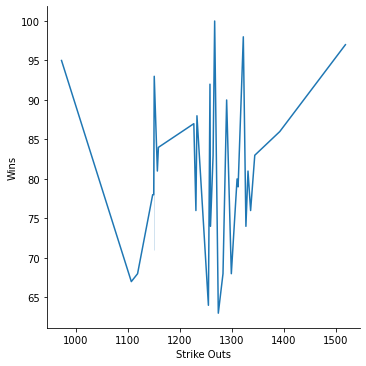

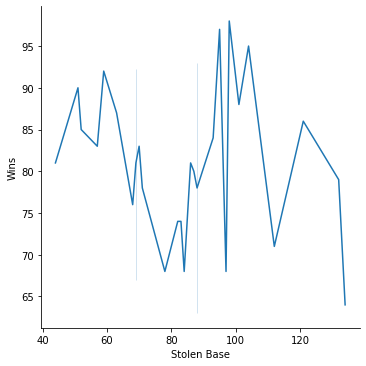

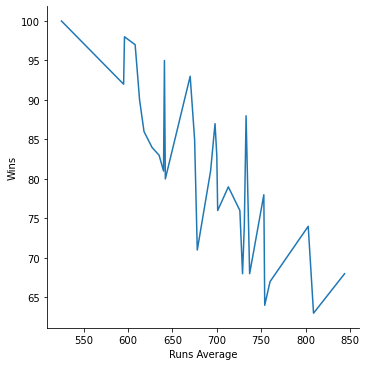

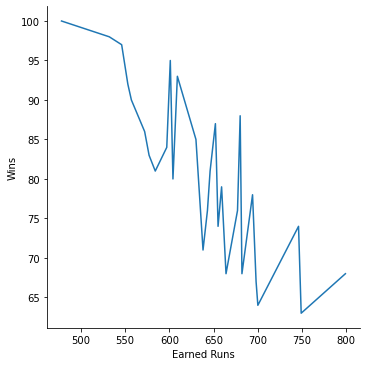

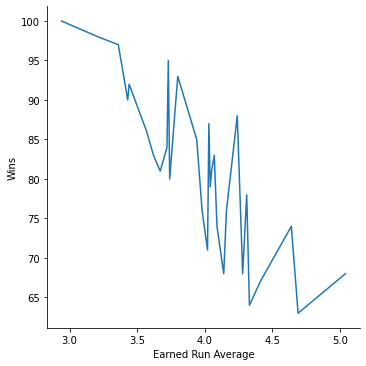

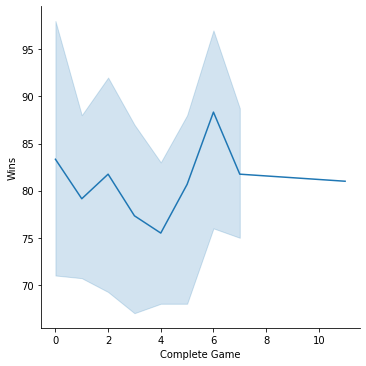

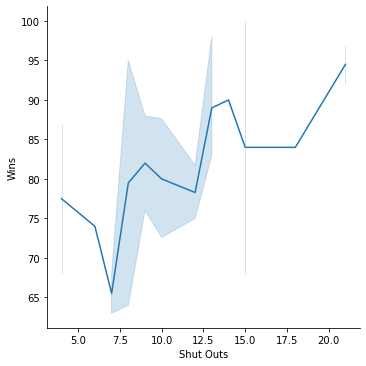

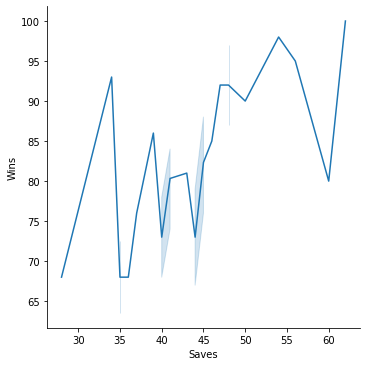

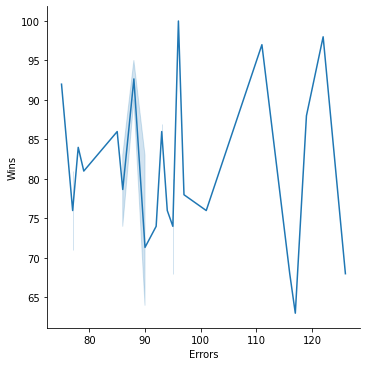

In [34]:
index = 0
features = df.drop("Wins", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="Wins", kind="line", data=df)
    index += 1
plt.show()

From line plots corresponding to the "Wins" column shows how those feature are related with the contribution on getting those particular numbers. Some of them are directly proportional while others are either inversely proportional to our label or do not have much to offer.

Multivariate Analysis :

Pair plot :

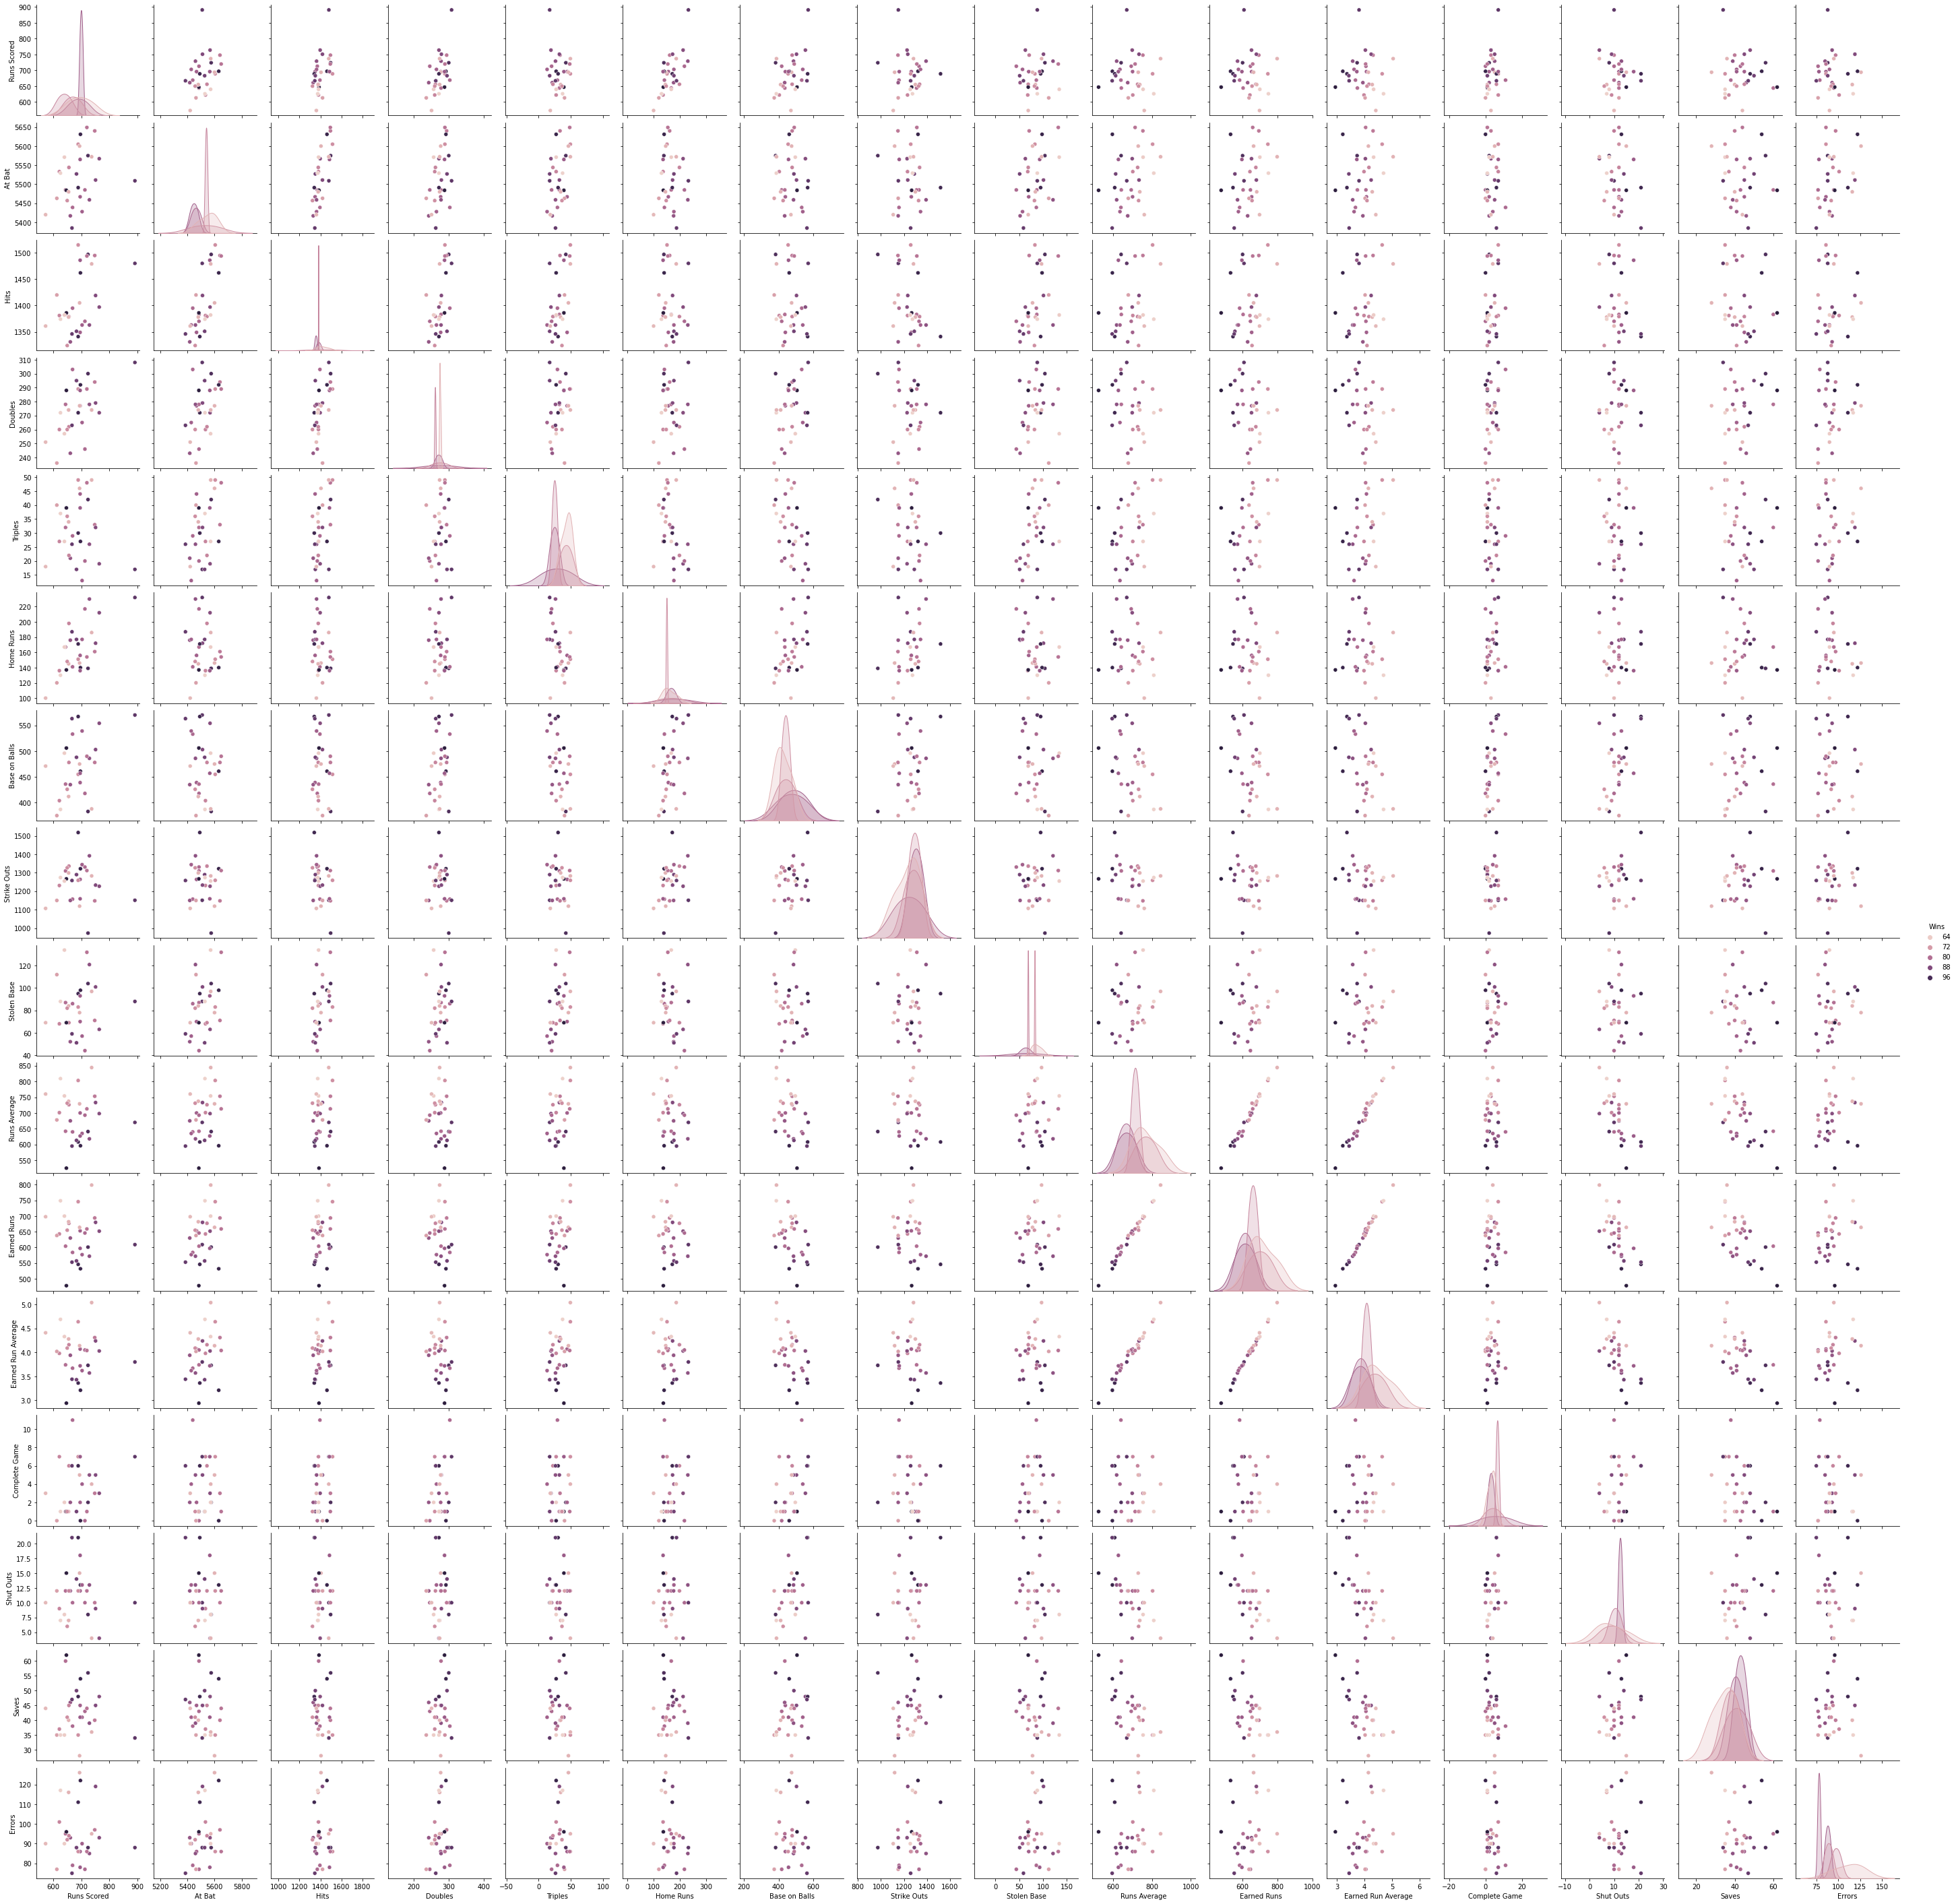

In [55]:
sns.pairplot(df, hue="Wins")

There are 17 columns present in our dataset making a pairplot for all of them has given us a very tiny image with an unreadable format therefore we will take help of a heatmap to get the collinearity details for the columns in our dataset.

In [56]:
df = df.drop(["Earned Runs", "Earned Run Average"], axis=1)

Feature columns "Earned Runs" and "Earned Run Average" have a high collinearity with the column "Runs Average" where all 3 are negatively correlated with our label column "Wins" therefore dropping the other two to avoid multi collinearity issue in our model.

# Outlier removal using Z Score :

In [57]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape before removing outliers: ", df.shape)
print ("Shape after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape before removing outliers:  (30, 15)
Shape after removing outliers:  (29, 15)
Percentage of data loss post outlier removal:  3.3333333333333335


We used the Z score method to remove any outlier that we could afford to lose from our original dataset. Since there were not many data points removed our new dataset would still have outlier traces but I would like to retain them.

Box Plot :

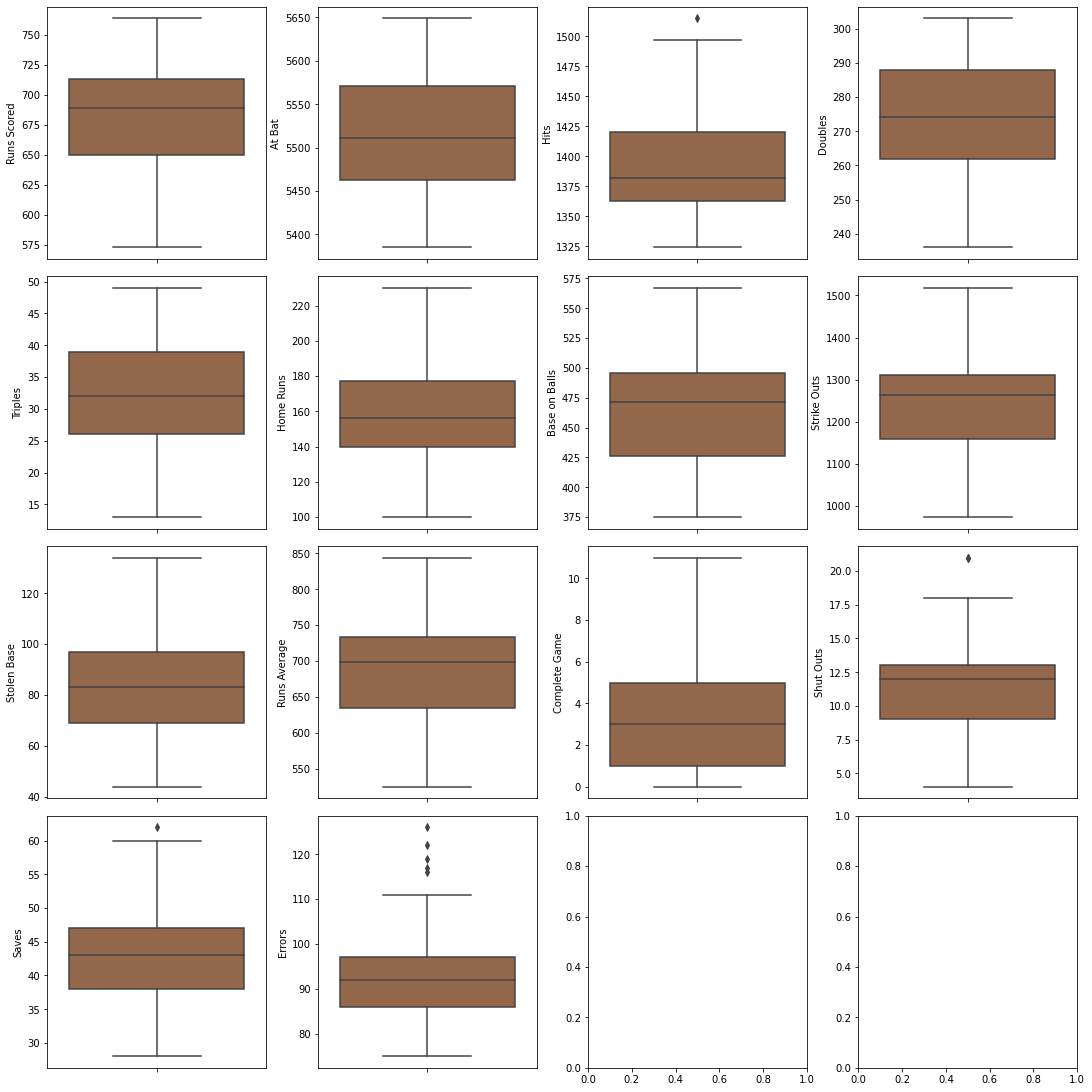

In [58]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="copper")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

There are light traces of outliers still present in our dataset.

Distribution Plot : 

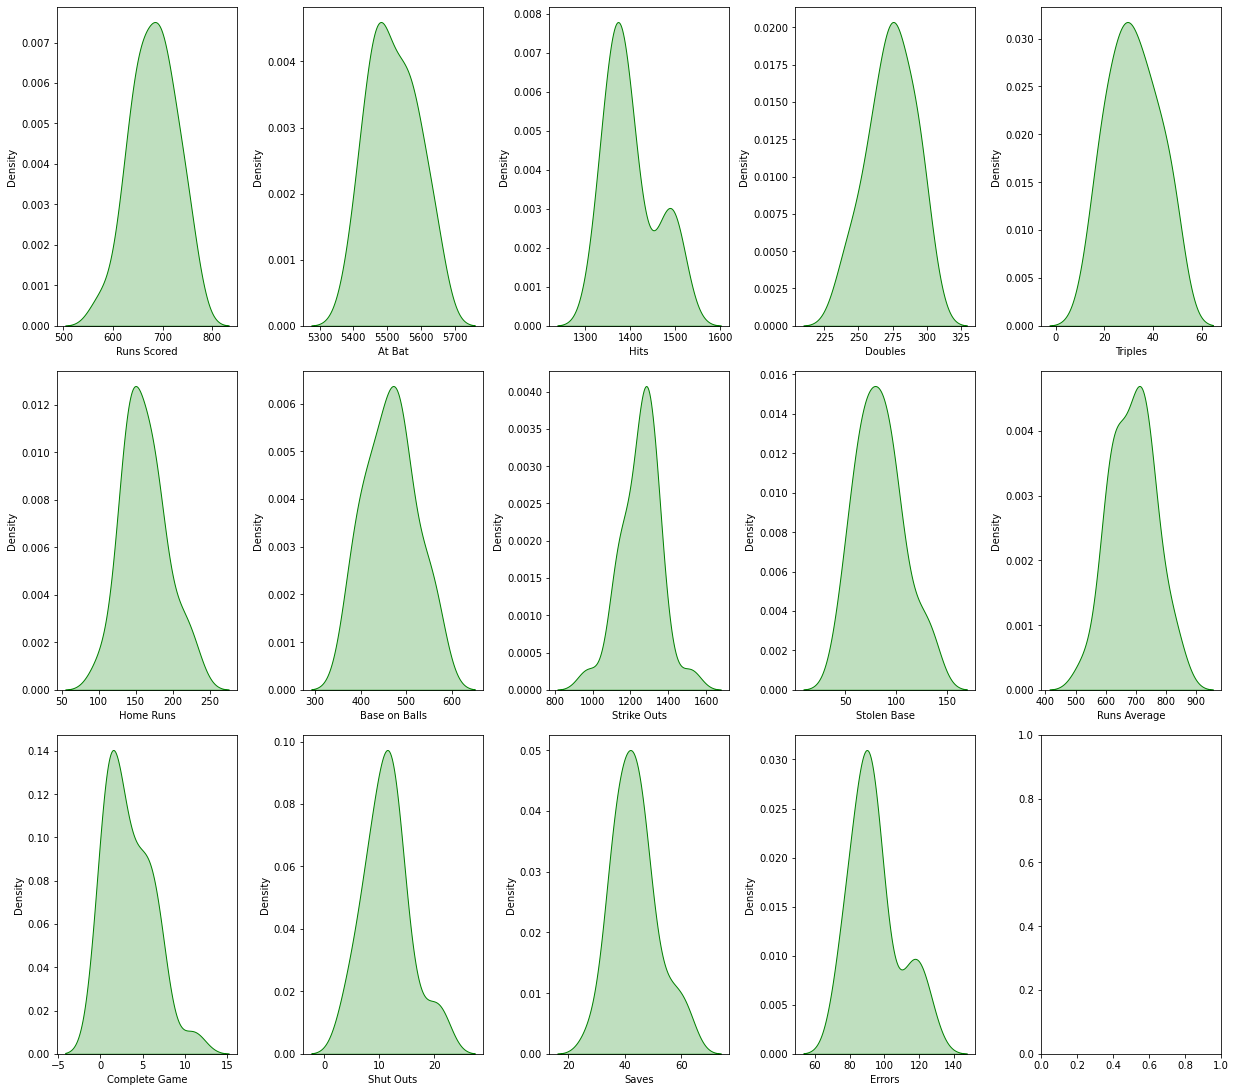

In [59]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

From above distribution plot we can see that almost all of the feature columns are able to show a bell shape curve indicating towards a normalized dataset.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label 

In [60]:
X = df.drop('Wins', axis=1)
Y = df['Wins']

# Feature Scaling 

In [62]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Complete Game,Shut Outs,Saves,Errors
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.363013,0.159299,-1.090948,-0.614898


# Finding best random state for building Regression Models

In [64]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("r2 score is", maxAccu,"on Random State", maxRS)

r2 score is 0.9558759193595404 on Random State 838


With the help of random state selection process we have found our number to be 838 amongst 1-1000

# Training and Testing:

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=838)

We are taking 25 percent of the complete dataset for training purpose and the remaing 75 percent with be used to train the machine learning models

# Machine Learning Model for Regression with Evaluation Metrics : 

In [67]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [68]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 3.9833293739808724
R2 Score is: 89.66219662319446
Cross Validation Score: 22.90651740850412
R2 Score - Cross Validation Score is 66.75567921469035


In [69]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 4.333336399853449
R2 Score is: 87.7656573483165
Cross Validation Score: 24.997598615648425
R2 Score - Cross Validation Score is 62.76805873266807


In [70]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 4.363792723135552
R2 Score is: 87.59307784229449
Cross Validation Score: 25.200882771181437
R2 Score - Cross Validation Score is 62.39219507111305


In [72]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 11.923058375147802
R2 Score is: 7.378636413522777
Cross Validation Score: -37.14432827877362
R2 Score - Cross Validation Score is 44.5229646922964


In [74]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 9.910738729495781
R2 Score is: 36.00472871305131
Cross Validation Score: -9.625013756046974
R2 Score - Cross Validation Score is 45.62974246909828


In [76]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 11.065611017049344
R2 Score is: 20.221359874160605
Cross Validation Score: -76.16990295148798
R2 Score - Cross Validation Score is 96.3912628256486


In [78]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 8.020395727527028
R2 Score is: 58.089057843097194
Cross Validation Score: -64.34747843840566
R2 Score - Cross Validation Score is 122.43653628150285


In [80]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 9.14145331717009
R2 Score is: 45.55395703960092
Cross Validation Score: -13.67041986885447
R2 Score - Cross Validation Score is 59.22437690845538


In [ ]:
# XGB Regressor
from xgboost import XGBRegressor
model=XGBRegressor()
reg(model, X, Y)

Created all Regressor model and checked it's evaluation metrics.

# Hyper parameter tuning on the best ML Model 

In [83]:
# Choosing Linear Regression

fmod_param = {'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }

In [84]:
GSCV = GridSearchCV(LinearRegression(), fmod_param, cv=5)

In [ ]:
GSCV.fit(X_train,Y_train)

In [ ]:
GSCV.best_params_

In [ ]:
Final_Model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs= -2, normalize=True, positive=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

We have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it

# Saving the best model 

In [ ]:
filename = "FinalModel_E01.pkl"
joblib.dump(Final_Model, filename)

Saved best regression model using the joblib library.